In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:\\Users\\M\\sql-work\\project\\구별65세이상인구.csv')
df.head()

,동별(1),75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
0,합계,"326,888","230,796","114,550","37,983","8,925","1,543"
1,종로구,"5,379","4,342","2,357",804,218,40
2,중구,"4,774","3,749","1,948",722,177,30
3,용산구,"6,996","5,571","3,308","1,167",297,65
4,성동구,"9,139","6,942","3,512","1,079",228,45


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)


In [ ]:
df.set_index('동별(1)', inplace = True)

In [ ]:
df.drop('합계', inplace = True)

In [ ]:
df.head()

,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
동별(1),,,,,,
종로구,"5,379","4,342","2,357",804,218,40
중구,"4,774","3,749","1,948",722,177,30
용산구,"6,996","5,571","3,308","1,167",297,65
성동구,"9,139","6,942","3,512","1,079",228,45
광진구,"10,439","7,407","3,699","1,178",282,54


In [ ]:
df['75~79세'] = df['75~79세'].str.replace(',', '')
df['80~84세'] = df['80~84세'].str.replace(',', '')
df['85~89세'] = df['85~89세'].str.replace(',', '')
df['90~94세'] = df['90~94세'].str.replace(',', '')
df['95~99세'] = df['95~99세'].str.replace(',', '')
df['100세 이상'] = df['100세 이상'].str.replace(',', '')

In [ ]:
df = df.astype('int')

In [ ]:
df['합계'] = df.sum(axis = 1)

In [ ]:
df.head()

,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상,합계
동별(1),,,,,,,
종로구,5379,4342,2357,804,218,40,13140
중구,4774,3749,1948,722,177,30,11400
용산구,6996,5571,3308,1167,297,65,17404
성동구,9139,6942,3512,1079,228,45,20945
광진구,10439,7407,3699,1178,282,54,23059


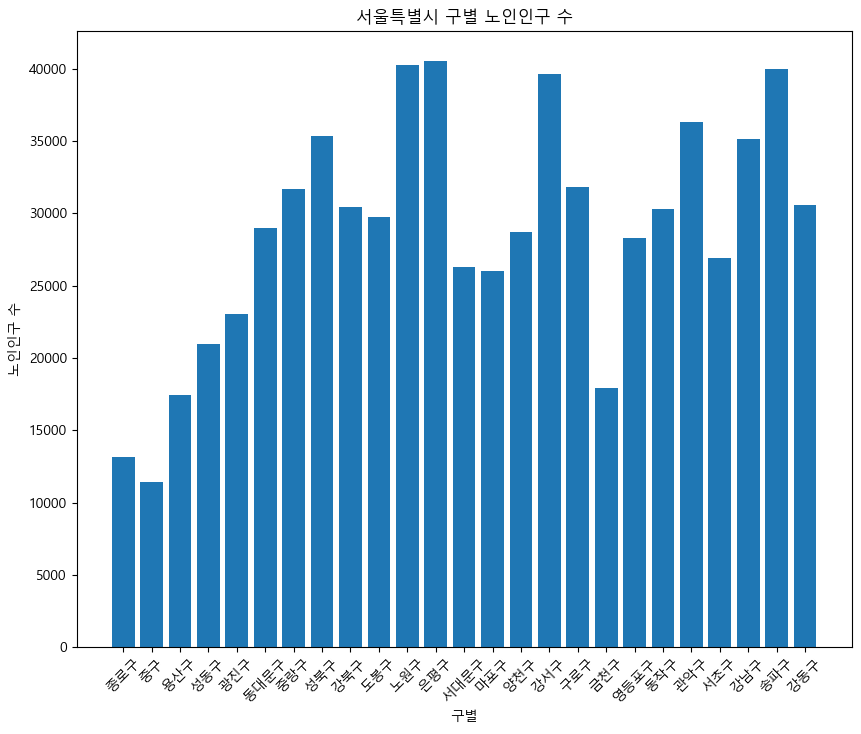

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df.index, df['합계'])
plt.xlabel('구별')
plt.xticks(rotation = 45)
plt.ylabel('노인인구 수')
plt.title('서울특별시 구별 노인인구 수')
plt.savefig('C:\\Users\\M\\sql-work\\project\\구별노인인구수.png', dpi = 300)

In [ ]:
df = df.reset_index()

In [ ]:
df.rename({'동별(1)':'gu'}, axis = 'columns', inplace = True)

In [ ]:
df.head()

,gu,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상,합계
0,종로구,5379,4342,2357,804,218,40,13140
1,중구,4774,3749,1948,722,177,30,11400
2,용산구,6996,5571,3308,1167,297,65,17404
3,성동구,9139,6942,3512,1079,228,45,20945
4,광진구,10439,7407,3699,1178,282,54,23059


In [ ]:
df1 = df[['gu','합계']]

In [ ]:
mf = pd.read_csv('C:\\Users\\M\\sql-work\\project\\무더위 쉼터 장소 정보.csv')

In [ ]:
mf['이용가능인원'] = mf['이용가능인원'].str.extract('(\d+)')
mf['capacity'] = mf['이용가능인원'].astype(int)
mf['gu'] = mf['주소'].apply(lambda x: x.split()[1])
gr = mf.groupby('gu')['capacity'].sum().reset_index()

gr.head()

,gu,capacity
0,강남구,1747
1,강동구,11532
2,강북구,2216
3,강서구,7109
4,관악구,2304


In [ ]:
mf = pd.merge(df1, gr, on = 'gu', how = 'inner')
mf.rename({'합계': '인구수'})
mf.head()
#mf.to_csv('인구수_수용인원.csv')

In [ ]:
mf['수용률'] = round((mf.capacity / mf.합계), 3)

In [ ]:
mf.sort_values('수용률', ascending = False)

,gu,합계,capacity,수용률
24,강동구,30544,11532,0.378
16,구로구,31820,11255,0.354
0,종로구,13140,4162,0.317
1,중구,11400,3497,0.307
7,성북구,35334,9705,0.275
14,양천구,28736,7426,0.258
15,강서구,39591,7109,0.180
2,용산구,17404,2994,0.172
9,도봉구,29720,4904,0.165
19,동작구,30281,4414,0.146
